# Sampling the Imaginary

In [1]:
using StatisticalRethinking

In [2]:
# code 3.1
Pr_Positive_Vampire = 0.95
Pr_Positive_Mortal = 0.01
Pr_Vampire = 0.001
Pr_Positive = Pr_Positive_Vampire * Pr_Vampire + Pr_Positive_Mortal * (1 - Pr_Vampire)
Pr_Vampire_Positive = Pr_Positive_Vampire * Pr_Vampire / Pr_Positive
Pr_Vampire_Positive

0.08683729433272395

## Sampling from a grid-approximate posterior

In [ ]:
# code 3.2
p_grid = range(0, stop=1, length=1000)
prior = ones(length(p_grid))

In [22]:
p_grid

0.0:0.001001001001001001:1.0

In [23]:
@which Binomial(9, 0.01)

(::Type{Binomial})(n::Integer, p::T; check_args) where T<:Real in Distributions at /home/simon/.julia/packages/Distributions/cNe2C/src/univariate/discrete/binomial.jl:32

In [25]:
@which pdf(Binomial(9, 0.01), 6)

pdf(d::Binomial, x::Int64) in Distributions at /home/simon/.julia/packages/Distributions/cNe2C/src/univariates.jl:547

In [26]:
@doc pdf(Binomial(9, 0.01), 6)

```
pdf(d::UnivariateDistribution, x::Real)
```

Evaluate the probability density (mass) at `x`.

See also: [`logpdf`](@ref).

```
pdf(d::MultivariateDistribution, x::AbstractArray)
```

Return the probability density of distribution `d` evaluated at `x`.

  * If `x` is a vector, it returns the result as a scalar.
  * If `x` is a matrix with n columns, it returns a vector `r` of length n, where `r[i]` corresponds

to `x[:,i]` (i.e. treating each column as a sample).

`pdf!(r, d, x)` will write the results to a pre-allocated array `r`.

```
pdf(d::MatrixDistribution, x::AbstractArray)
```

Compute the probability density at the input matrix `x`.

```
pdf(d::Union{UnivariateMixture, MultivariateMixture}, x)
```

Evaluate the (mixed) probability density function over `x`. Here, `x` can be a single sample or an array of multiple samples.


In [28]:
function binomial_pdf(x, size, prob)
    return binomial(size, x) * prob ^ x * (1 - prob)^(size - x)
end

binomial_pdf (generic function with 1 method)

In [30]:
binomial_pdf(4, 10, 0.5)

0.205078125

In [31]:
binomial_pdf(3, 10, 0.4)

0.21499084799999998

In [32]:
likelihood = pdf.(Binomial.(9, p_grid), 6)
posterior = likelihood .* prior
posterior = posterior / sum(posterior)

1000-element Array{Float64,1}:
 0.0
 8.433658816529949e-19
 5.381332819661488e-17
 6.111248552252795e-16
 3.4233680569896317e-15
 1.301977811569359e-14
 3.875963258549837e-14
 9.744233005994819e-14
 2.1646380549927379e-13
 4.375070384958176e-13
 8.20754511434005e-13
 1.4496105748714324e-12
 2.4359217775302185e-12
 ⋮
 1.0503743959559143e-6
 7.939664540200775e-7
 5.823218682379405e-7
 4.114682141668316e-7
 2.7732470313529473e-7
 1.7570076237332644e-7
 1.0229460346700482e-7
 5.269177907528305e-8
 2.2363727846061394e-8
 6.6663074687179304e-9
 8.383158000066788e-10
 0.0

In [35]:
@which sample(p_grid, Weights(posterior), length(p_grid))

sample(a::AbstractArray, wv::AbstractWeights, n::Integer; replace, ordered) in StatsBase at /home/simon/.julia/packages/StatsBase/aknjg/src/sampling.jl:874

In [36]:
p_grid

0.0:0.001001001001001001:1.0

In [ ]:
samples = sample(p_grid, Weights(posterior), length(p_grid))

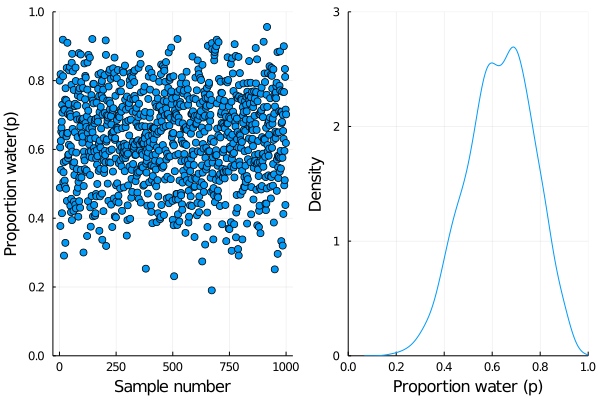

In [38]:
p1 = scatter(samples, ylim=(0, 1), xlab="Sample number", ylab="Proportion water(p)", leg=false)
p2 = density(samples, xlim=(0.0, 1.0), ylim=(0.0, 3.0),xlab="Proportion water (p)",ylab="Density", leg=false)
plot(p1, p2, layout=(1,2))

## Sampling to summarize